# Pymaceuticals Inc.
---

### Analysis

1. Capomulin and Ramicane were substatially better at reducing tumor size than Infubino and Ceftamin

2. Mice treated with Capomulin and Ramicane lived longer than those treated with any other drug

3. Average tumor size was strongly correlated with average mouse weight 
 

In [147]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [148]:
# Checking the number of mice.
df.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [149]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = df[df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print(duplicates)

['g989']


In [150]:
# Optional: Get all the data for the duplicate mouse ID. 
g989rows = df[df['Mouse ID'] == 'g989']
g989rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [151]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], inplace=True)
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [152]:
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()

249

## Summary Statistics

In [153]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
sem = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_stats = df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, 'sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

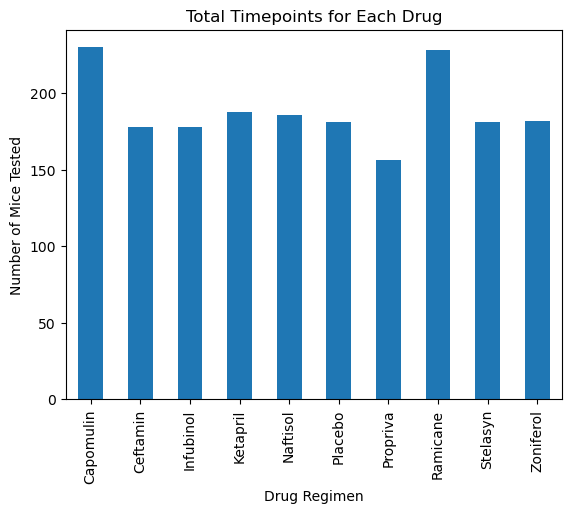

In [173]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_counts = df.groupby('Drug Regimen')['Timepoint'].count()
ax = timepoint_counts.plot(kind='bar')
ax.set_title('Total Timepoints for Each Drug')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Mice Tested')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

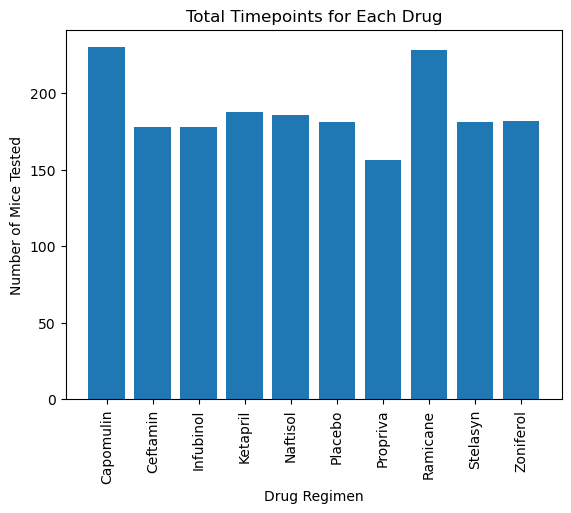

In [172]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoint_counts.index, timepoint_counts.values)
plt.title('Total Timepoints for Each Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)

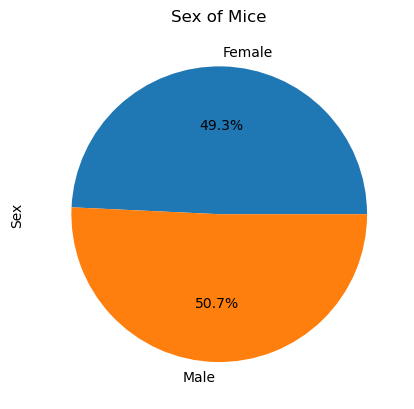

In [169]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = df.groupby('Sex').count()['Mouse ID']
ax = sex_counts.plot(kind='pie', labels=sex_counts.index, autopct='%1.1f%%')
ax.set_title('Sex of Mice')
ax.set_ylabel('Sex')
plt.show()

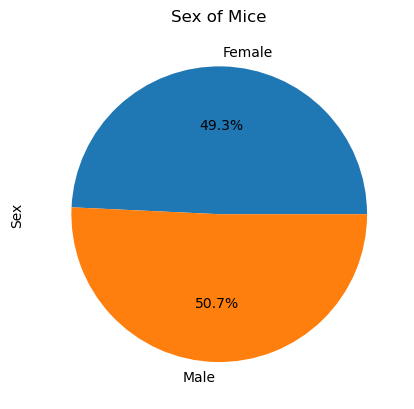

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = df.groupby('Sex').count()['Mouse ID']
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Sex of Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [158]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(df, max_timepoints, on=['Mouse ID', 'Drug Regimen', 'Timepoint'])
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [159]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = []
outliers = {}

for drug in treatments:
    drug_rows = merged_df.loc[merged_df['Drug Regimen'] == drug]
    max_timepoints = drug_rows.groupby('Mouse ID')['Timepoint'].max()
    final_tumor_vol = pd.merge(max_timepoints, drug_rows, on=['Mouse ID', 'Timepoint'])[['Mouse ID', 'Tumor Volume (mm3)']]
    final_tumor_volume.append(final_tumor_vol)
    
    # Calculate quartiles, IQR, and bounds for potential outliers
    quartiles = final_tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Find outliers
    outliers_list = final_tumor_vol.loc[(final_tumor_vol['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_vol['Tumor Volume (mm3)'] > upper_bound)]
    outliers[drug] = list(outliers_list['Mouse ID'])
    
print("Outliers by Drug Regimen:")
print(outliers)
    

Outliers by Drug Regimen:
{'Capomulin': [], 'Ramicane': [], 'Infubinol': ['c326'], 'Ceftamin': []}


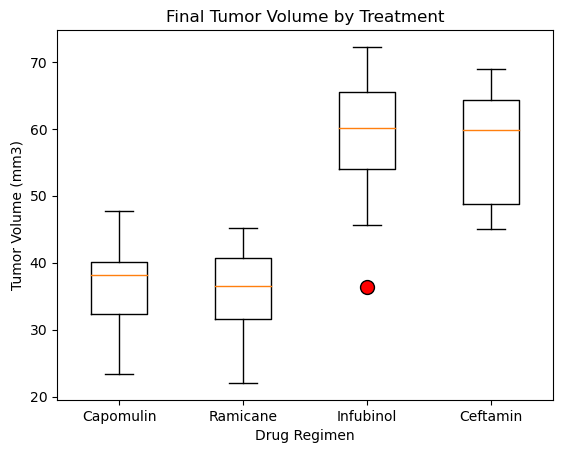

In [160]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volumes = [vol['Tumor Volume (mm3)'] for vol in final_tumor_volume]

fig, ax = plt.subplots()
ax.boxplot(tumor_volumes, flierprops=dict(marker='o', markerfacecolor='red', markersize=10))

ax.set_title('Final Tumor Volume by Treatment')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')

ax.set_xticklabels(treatments)

plt.show()


## Line and Scatter Plots

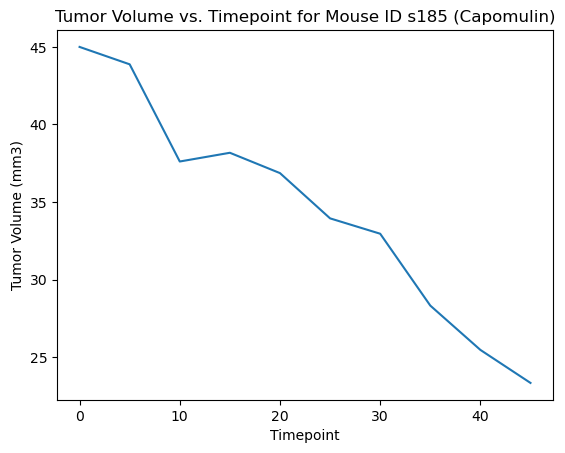

In [161]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = df.loc[df['Drug Regimen'] == 'Capomulin']
mouse_id = 's185'
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == mouse_id]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title(f'Tumor Volume vs. Timepoint for Mouse ID {mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight')

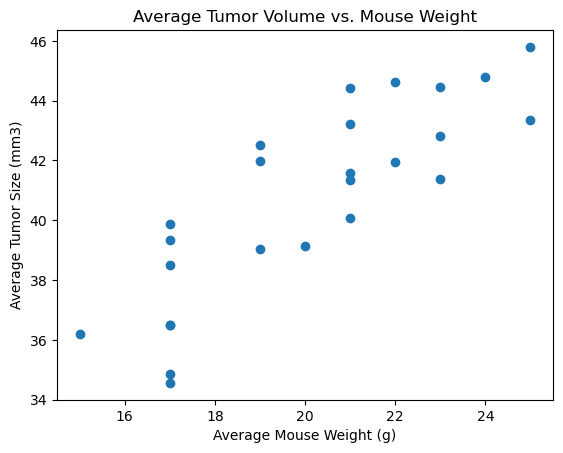

In [162]:
# Generate scatter plot for average tumor volume vs mouse weight for Capomulin group

capomulin_group = df[df['Drug Regimen'] == 'Capomulin']
avg_tumor = capomulin_group.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight = capomulin_group.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(x=avg_weight, y=avg_tumor)
plt.xlabel('Average Mouse Weight (g)')
plt.ylabel('Average Tumor Size (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight')

## Correlation and Regression

The correlation coefficient between tumor size and color mouse weight is 0.84
The r-squared is: 0.7088568047708723


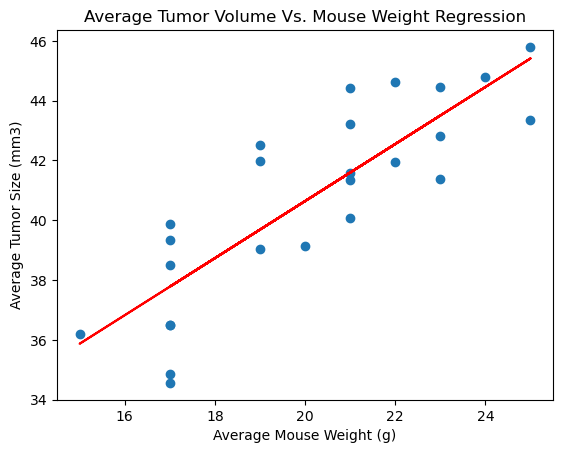

In [168]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_weight
y_values = avg_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('Average Tumor Volume Vs. Mouse Weight Regression')
plt.xlabel('Average Mouse Weight (g)')
plt.ylabel('Average Tumor Size (mm3)')
print(f"The correlation coefficient between tumor size and color mouse weight is {round(st.pearsonr(avg_weight,avg_tumor)[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()